<a href="https://colab.research.google.com/github/GitSantiagopf/QuantumParticleBoxSolver/blob/main/QuantumParticleBoxSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solución ecuación de schrodinger para una particula en una caja con paredes infinitas**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a=1
N=600
x = np.linspace(0,a,N+1)
Delta_x = x[1]-x[0]

hbar = 1
m =1

In [ ]:
M = np.diag(-2*np.ones(N-1)) + np.diag(np.ones(N-2),1)+ np.diag(np.ones(N-2),-1)
print(M)
print(M.shape)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
(599, 599)


In [ ]:

H = -hbar**2/(2*m)* 1/(Delta_x)**2 * M

E, psi = np.linalg.eigh(H)

In [ ]:
psi = psi.T


In [ ]:
def integral(f, axis=0):
    return np.sum(f*Delta_x, axis=axis)

norms = integral(psi**2)
psi = psi/np.sqrt(norms)

In [ ]:
def true_psi(n,x):

    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)

In [ ]:
def energy(n):

    return hbar**2 * np.pi**2 * n**2/(2*m*a**2)

for n in range(0,3):

    print('Energía',n,'obtenida: {:.3f}'.format(E[n]))




Energía 0 obtenida: 4.935
Energía 1 obtenida: 19.739
Energía 2 obtenida: 44.412


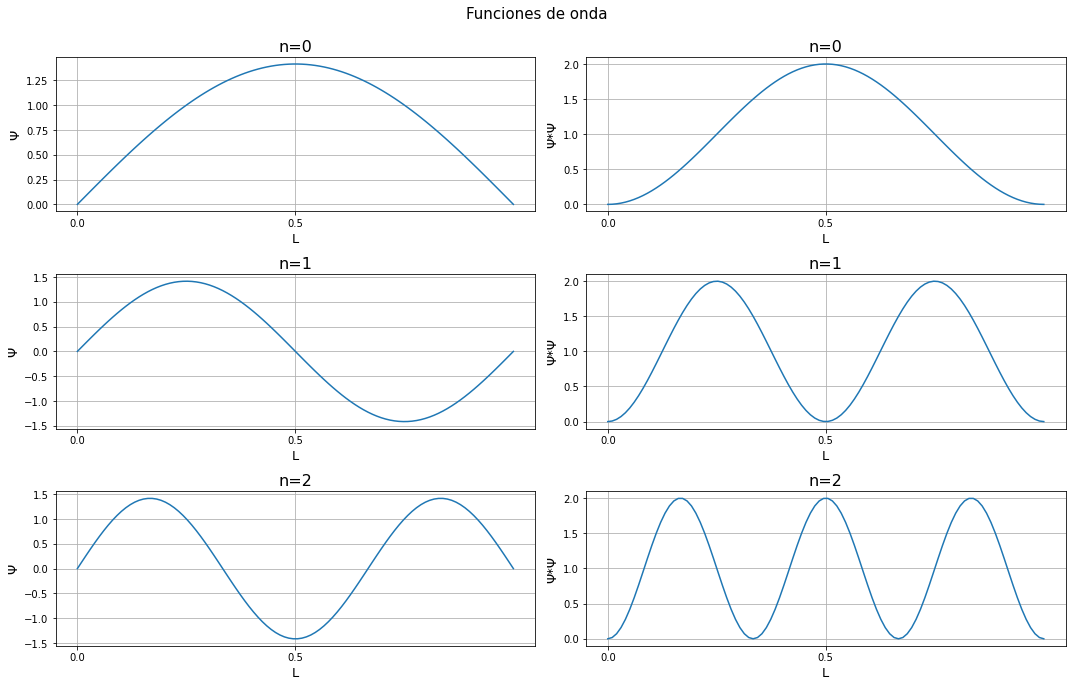

In [ ]:
x_list = np.linspace(0,1,100)
def true_psi(n,x):
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)
def psi_2(n,a,x):
    return np.square(true_psi(n,x))
plt.figure(figsize=(15,10))
plt.suptitle("Funciones de onda", fontsize=15)
for n in range(1,4):
    psi_2_list = []
    psi_list = []
    for x in x_list:
        psi_2_list.append(psi_2(n,a,x))
        psi_list.append(true_psi(n,x))
    plt.subplot(3,2,2*n-1)
    plt.plot(x_list, psi_list)
    plt.xlabel("L", fontsize=13)
    plt.ylabel("Ψ", fontsize=13)
    plt.xticks(np.arange(0, 1, step=0.5))
    plt.title("n="+str(n-1), fontsize=16)
    plt.grid()
    plt.subplot(3,2,2*n)
    plt.plot(x_list, psi_2_list)
    plt.xlabel("L", fontsize=13)
    plt.ylabel("Ψ*Ψ", fontsize=13)
    plt.xticks(np.arange(0, 1, step=0.5))
    plt.title("n="+str(n-1), fontsize=16)
    plt.grid()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])